# EDA Alice In Wonderland
## Load the texts

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import lines
from matplotlib import patches
from matplotlib.patheffects import withStroke
import seaborn as sns

import requests

import warnings
warnings.filterwarnings('ignore')

from collections import Counter
import re

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/iffiness/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# read the data from the folders
links = {
    'xter_info' : 'https://raw.githubusercontent.com/Priya22/project-dialogism-novel-corpus/b670b9a3359438a1dcf9f9516321d801f283749e/data/AlicesAdventuresInWonderland/character_info.csv',
    'novel' : 'https://raw.githubusercontent.com/Priya22/project-dialogism-novel-corpus/b670b9a3359438a1dcf9f9516321d801f283749e/data/AlicesAdventuresInWonderland/novel_text.txt',
    'quotes' : 'https://raw.githubusercontent.com/Priya22/project-dialogism-novel-corpus/b670b9a3359438a1dcf9f9516321d801f283749e/data/AlicesAdventuresInWonderland/quotation_info.csv'}

# Read the data add column names
characters = pd.read_csv(links['xter_info']) #✅
novel_text = pd.read_csv(links['novel'], delimiter='\t', names=['Texts']) #✅
quotes_src = pd.read_csv(links['quotes']) #✅

In [3]:
display(characters.head(), novel_text.head(), quotes_src.head())

,Character ID,Main Name,Aliases,Gender,Category
0,0,Alice,{'Alice'},F,major
1,1,"Bill, The Lizard","['Bill, The Lizard']",X,minor
2,2,Five,{'Five'},M,minor
3,3,Hare,"{'March Hare', 'Hare'}",M,minor
4,4,Alice'S Sister,"{'Her Sister', ""Alice'S Sister""}",F,minor


,Texts
0,CHAPTER I.
1,Down the Rabbit-Hole
2,Alice was beginning to get very tired of sitti...
3,"bank, and of having nothing to do: once or twi..."
4,"the book her sister was reading, but it had no..."


,quoteID,quoteText,subQuotationList,quoteByteSpans,speaker,addressees,quoteType,referringExpression,mentionTextsList,mentionSpansList,mentionEntitiesList
0,Q0,"and what is the use of a book, without picture...","['and what is the use of a book,', 'without pi...","[[254, 284], [301, 335]]",Alice,[],Explicit,thought Alice,"[[], []]","[[], []]","[[], []]"
1,Q1,Oh\ndear! Oh dear! I shall be late!,['Oh\ndear! Oh dear! I shall be late!'],"[[765, 799]]",The White Rabbit,['The White Rabbit'],Explicit,the Rabbit say to itself,[[]],[[]],[[]]
2,Q2,"Well! after such a fall as this, I shall\nthin...","['Well!', ""after such a fall as this, I shall\...","[[2420, 2425], [2454, 2647]]",Alice,['Alice'],Explicit,thought Alice to herself,"[[], []]","[[], []]","[[], []]"
3,Q3,I wonder how\nmany miles I've fallen by this t...,"[""I wonder how\nmany miles I've fallen by this...","[[2738, 2787], [2806, 2925], [3184, 3281]]",Alice,[],Anaphoric,she said,"[[], [], []]","[[], [], []]","[[], [], []]"
4,Q4,I wonder if I shall fall right _through_\nthe ...,"[""I wonder if I shall fall right _through_\nth...","[[3419, 3584], [3691, 3813], [3945, 4077]]",Alice,[],Anaphoric,she began,"[[], [], []]","[[], [], []]","[[], [], []]"


In [4]:
# Count words in in the novel_text dataframe
# Output: count of words in the novel_text dataframe

# Combine the rows into a single string and make all the words lowercase
text = ' '.join(novel_text['Texts']).lower()
# Use regex to remove punctuation then split the string into a list of words
texts = re.sub(r'[^\w\s]','',text).split(' ')
# Remove empty strings from the list
texts = [word for word in texts if word != '']
# Remove stopwords from the list
stopwords = set(stopwords.words('english'))
texts = [word for word in texts if word not in stopwords]

# Count the words
word_count = Counter(texts)
"""
    # Convert the Counter object to a dataframe
    word_count = pd.DataFrame.from_dict(word_count, orient='index').reset_index()
    
    # Rename the columns
    word_count.columns = ['word', 'count']
    # Sort the dataframe by the count column
    word_count = word_count.sort_values(by='count', ascending=False).reset_index(drop=True)
"""
print(word_count)

Counter({'said': 460, 'alice': 385, 'little': 126, 'one': 98, 'like': 85, 'know': 84, 'went': 83, 'would': 78, 'thought': 74, 'could': 74, 'time': 68, 'queen': 68, 'see': 65, 'king': 61, 'well': 60, 'dont': 58, 'began': 57, 'mock': 56, 'hatter': 55, 'turtle': 55, 'gryphon': 55, 'im': 54, 'quite': 53, 'way': 52, 'much': 51, 'say': 50, 'go': 50, 'think': 49, 'first': 49, 'thing': 49, 'head': 48, 'voice': 47, 'get': 46, 'looked': 45, 'come': 45, 'got': 45, 'rabbit': 43, 'never': 43, 'must': 41, 'round': 41, 'came': 40, 'tone': 40, 'great': 39, 'duchess': 39, 'dormouse': 39, 'oh': 38, 'mouse': 38, 'back': 38, 'two': 36, 'cat': 35, 'nothing': 34, 'large': 33, 'ive': 33, 'last': 33, 'march': 33, 'found': 32, 'long': 32, 'ill': 32, 'put': 31, 'right': 31, 'tell': 31, 'hare': 31, 'made': 30, 'white': 30, 'next': 30, 'thats': 30, 'heard': 30, 'looking': 30, 'dear': 29, 'moment': 29, 'door': 29, 'replied': 29, 'look': 28, 'things': 28, 'might': 28, 'eyes': 27, 'seemed': 27, 'going': 27, 'poor': 

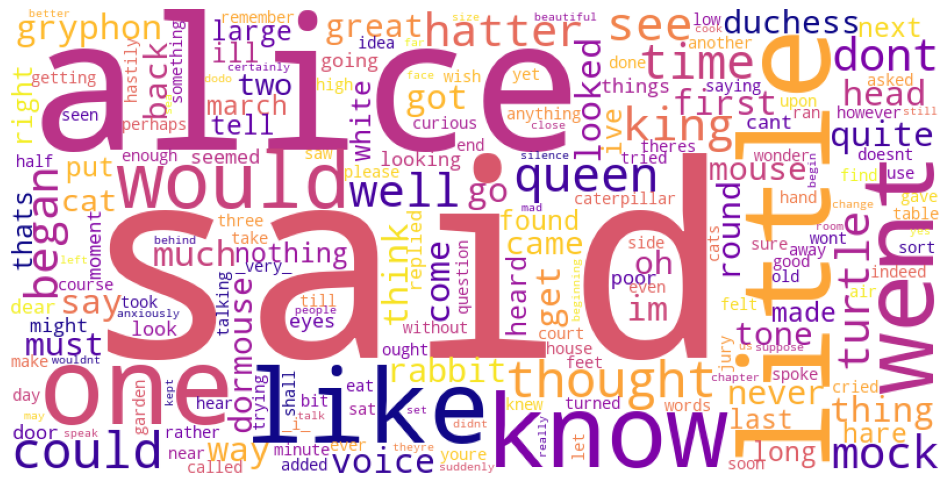

In [37]:
# Visualize the word and counts using a word cloud
from wordcloud import WordCloud

word_cloud = WordCloud(width=800, 
                       height=400, 
                       margin=0,
                    #    max_words=20,
                       stopwords=None, 
                       background_color='white',
                       colormap='plasma',
                       ).generate_from_frequencies(word_count)

# Display the generated image:
plt.figure(figsize=(12, 10))
plt.imshow(word_cloud)
plt.axis("off")
plt.savefig('images/general_word_count.svg')
plt.savefig('images/general_word_count.jpg')


,word,count
0,thought,74
1,could,74


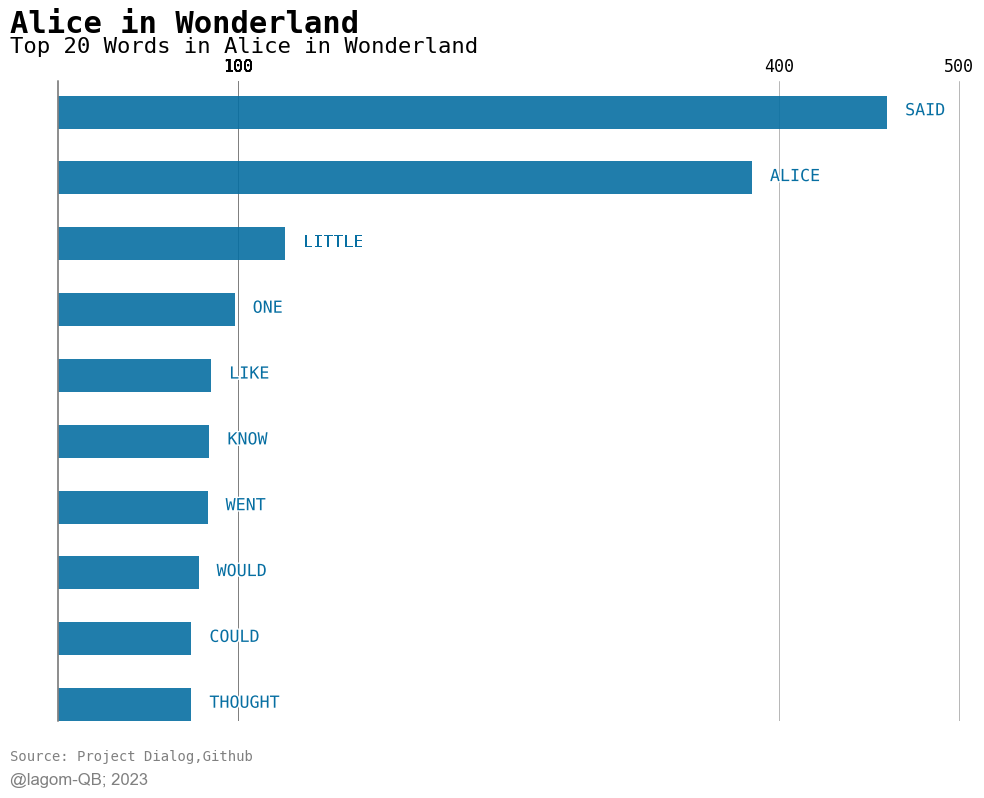

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))

# Convert the Counter object to a dataframe
wordCount = pd.DataFrame.from_dict(dict(word_count), orient='index').reset_index()
# Rename the columns
wordCount.columns = ['word', 'count']
# Sort the dataframe by the count column
wordCount = wordCount.sort_values(by='count', ascending=True).reset_index(drop=True)

topN = 10
topNWords = wordCount.tail(topN).reset_index(drop=True)
# Get the y positions for the labels
y = [i*.9 for i in range(len(topNWords.word))]
display(topNWords.head(2))

ax.barh(y= y,#topNWords['word'],
        width=topNWords['count'], 
        color='#076fa2', 
        height=0.45, 
        align='edge', 
        alpha=0.9)

unique_counts = topNWords['count'].unique()
tick_locations = np.round(unique_counts / 100) * 100

# Customize the plot
ax.xaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)
ax.xaxis.set_ticks(ticks=tick_locations)
ax.xaxis.set_ticklabels([int(loc) for loc in tick_locations], 
                        size=12, 
                        fontfamily="monospace", 
                        fontweight=100)
ax.set_xlim((0, 1.1 * max(topNWords['count'])))
ax.set_ylim((0, len(topNWords.word)*.9-.25))

ax.set_axisbelow(True)
ax.grid(axis='x', color='grey', lw=.4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_lw(1.4)
ax.spines['left'].set_color('grey')
ax.spines['left'].set_alpha(.9)
ax.spines['left'].set_capstyle('round')

#---Labels---
ax.yaxis.set_visible(False)
PADDING = 10
# Add the word labels in the middle of the bars
for words, count, y_pos in zip(topNWords['word'], topNWords['count'], y):
        x = 0
        color = 'white'
        path_effects = None
        # make words uppercase
        words = words.upper()
        if count < 500:
            x = count
            color = '#076fa2'
            path_effects=[withStroke(linewidth=2, foreground='white')]

        ax.text(x=x + PADDING, 
                y=y_pos + .5/2, 
                s=words, 
                size=12,
                color=color,
                va='center',
                path_effects=path_effects, 
                fontfamily="monospace", 
                fontweight=100)
        
#Room for the title
fig.subplots_adjust(top=0.9, left=0.14, bottom=0.1, right=0.9)
# Add the title
fig.text(x=0.1, 
         y=0.96, 
         s="Alice in Wonderland", 
         fontsize=22, 
         fontweight='bold', 
         fontfamily="monospace")
# Add the subtitle
fig.text(x=0.1,
         y=0.935,
         s="Top 20 Words in Alice in Wonderland",
         fontsize=16,
         fontfamily="monospace")
# Add the source and caption
fig.text(x=0.1,
         y=0.05,
         s="Source: Project Dialog,Github",
         color='grey',
         fontsize=10,
         fontfamily="monospace")
# Add author
fig.text(x=0.1,
         y=0.02,
         s="@lagom-QB; 2023",
         fontsize=12, 
         fontfamily="Arial", 
         color="grey")

# Save the figure
plt.savefig('images/top20_word_count.svg')

The __10__ most common words are : 
- said    : _460_
- alice   : _385_ 
- little  : _126_
- one     : _98_
- like    : _85_
- know    : _84_
- went    : _83_
- would   : _78_
- thought : _74_
- could   : _74_

### Who are the main characters in the novel?

In [7]:
characters.head()

,Character ID,Main Name,Aliases,Gender,Category
0,0,Alice,{'Alice'},F,major
1,1,"Bill, The Lizard","['Bill, The Lizard']",X,minor
2,2,Five,{'Five'},M,minor
3,3,Hare,"{'March Hare', 'Hare'}",M,minor
4,4,Alice'S Sister,"{'Her Sister', ""Alice'S Sister""}",F,minor


In [8]:
main_xters = characters[
    (characters['Category'] == 'major') | 
    (characters['Category'] == 'intermediate')].reset_index(drop=True)
display(main_xters.head())

characters['Category'].value_counts()

,Character ID,Main Name,Aliases,Gender,Category
0,0,Alice,{'Alice'},F,major
1,6,The Cat,"{'The Cat', 'Cheshire Cat'}",U,intermediate
2,7,The Caterpillar,{'The Caterpillar'},M,intermediate
3,10,The Dormouse,"{'A Dormouse', 'The Dormouse'}",M,intermediate
4,11,The Duchess,{'The Duchess'},F,intermediate


Category
minor           40
intermediate    10
major            1
Name: count, dtype: int64

The __main__ character is _Alice_ with _The cat, the Caterpillar, the doormouse_ and _The Duchess_ as __intermediate__ characters

In [9]:
quotes_src.head()

,quoteID,quoteText,subQuotationList,quoteByteSpans,speaker,addressees,quoteType,referringExpression,mentionTextsList,mentionSpansList,mentionEntitiesList
0,Q0,"and what is the use of a book, without picture...","['and what is the use of a book,', 'without pi...","[[254, 284], [301, 335]]",Alice,[],Explicit,thought Alice,"[[], []]","[[], []]","[[], []]"
1,Q1,Oh\ndear! Oh dear! I shall be late!,['Oh\ndear! Oh dear! I shall be late!'],"[[765, 799]]",The White Rabbit,['The White Rabbit'],Explicit,the Rabbit say to itself,[[]],[[]],[[]]
2,Q2,"Well! after such a fall as this, I shall\nthin...","['Well!', ""after such a fall as this, I shall\...","[[2420, 2425], [2454, 2647]]",Alice,['Alice'],Explicit,thought Alice to herself,"[[], []]","[[], []]","[[], []]"
3,Q3,I wonder how\nmany miles I've fallen by this t...,"[""I wonder how\nmany miles I've fallen by this...","[[2738, 2787], [2806, 2925], [3184, 3281]]",Alice,[],Anaphoric,she said,"[[], [], []]","[[], [], []]","[[], [], []]"
4,Q4,I wonder if I shall fall right _through_\nthe ...,"[""I wonder if I shall fall right _through_\nth...","[[3419, 3584], [3691, 3813], [3945, 4077]]",Alice,[],Anaphoric,she began,"[[], [], []]","[[], [], []]","[[], [], []]"


In [10]:
pd.DataFrame({'count': quotes_src['speaker'].value_counts().values,
                            'Value': quotes_src['speaker'].value_counts().keys()
                            }).sort_values(by='count', ascending=False).head(10)

,count,Value
0,283,Alice
1,52,The King Of Hearts
2,42,The Mock Turtle
3,42,The Gryphon
4,42,The Hatter
5,31,The Queen
6,30,The White Rabbit
7,24,The Duchess
8,20,The Dormouse
9,20,The Caterpillar


,count,Value
0,20,The Caterpillar
1,20,The Dormouse
2,24,The Duchess
3,30,The White Rabbit
4,31,The Queen
5,42,The Hatter
6,42,The Gryphon
7,42,The Mock Turtle
8,52,The King Of Hearts
9,283,Alice


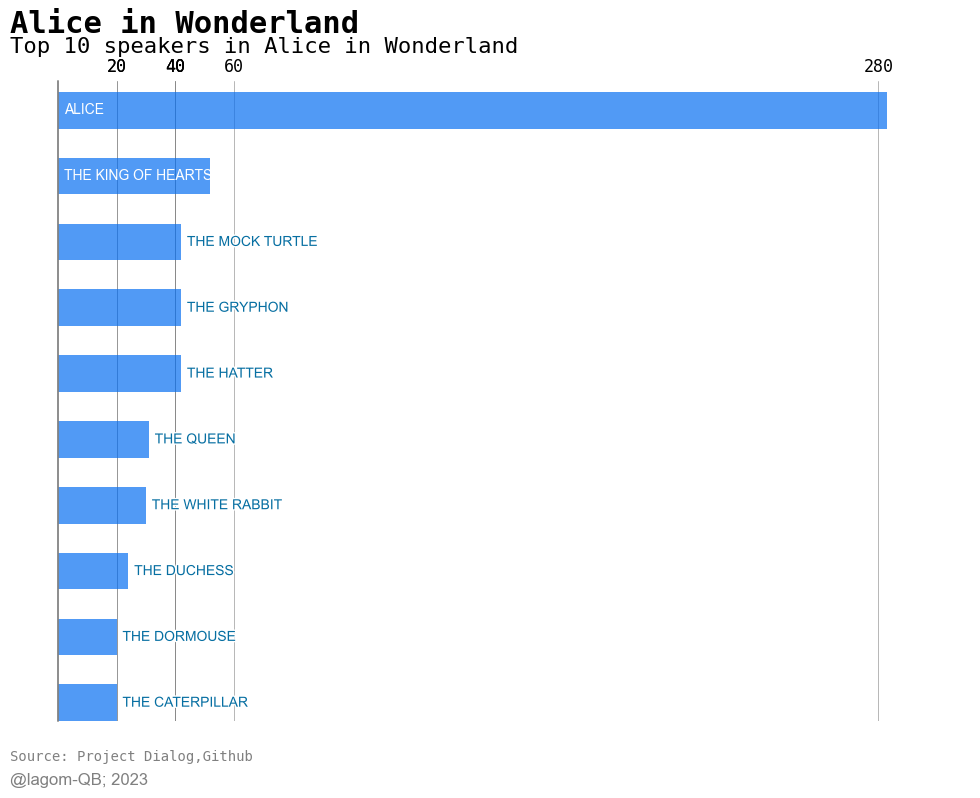

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))

# Convert the Counter object to a dataframe
quotesCount = pd.DataFrame({'count': quotes_src['speaker'].value_counts().values,
                            'Value': quotes_src['speaker'].value_counts().keys()
                            })
# Sort the dataframe by the count column
quotesCount = quotesCount.sort_values(by='count', ascending=True).reset_index(drop=True)

topN = 10
topNWords = quotesCount.tail(topN).reset_index(drop=True)
# Get the y positions for the labels
y = [i*.9 for i in range(len(topNWords['Value']))]
display(topNWords)

ax.barh(y= y,
        width=topNWords['count'], 
        color='#076ff2', 
        height=0.5, 
        align='edge', 
        alpha=0.7)

unique_counts = topNWords['count'].unique()
tick_locations = np.round(unique_counts/20)*20

# Customize the plot
ax.xaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)
ax.xaxis.set_ticks(ticks=tick_locations)
ax.xaxis.set_ticklabels([int(loc) for loc in tick_locations], 
                        size=12, 
                        fontfamily="monospace", 
                        fontweight=100)
ax.set_xlim((0, 1.1 * max(topNWords['count'])))
ax.set_ylim((0, len(topNWords.Value)*.9-.25))

ax.set_axisbelow(True)
ax.grid(axis='x', color='grey', lw=.4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_lw(1.4)
ax.spines['left'].set_color('grey')
ax.spines['left'].set_alpha(.9)
ax.spines['left'].set_capstyle('round')

#---Labels---
ax.yaxis.set_visible(False)
PADDING = 2
# Add the word labels in the middle of the bars
for words, count, y_pos in zip(topNWords['Value'], topNWords['count'], y):
        x = 0
        color = 'white'
        path_effects = None
        # make words uppercase
        words = words.upper()
        if count < 50:
            x = count
            color = '#076fa2'
            path_effects=[withStroke(linewidth=2, foreground='white')]

        ax.text(x=x + PADDING, 
                y=y_pos + .5/2, 
                s=words, 
                size=10,
                color=color,
                va='center',
                path_effects=path_effects, 
                fontfamily="arial", 
                fontweight=100)
        
#Room for the title
fig.subplots_adjust(top=0.9, left=0.14, bottom=0.1, right=0.9)
# Add the title
fig.text(x=0.1, 
         y=0.96, 
         s="Alice in Wonderland", 
         fontsize=22, 
         fontweight='bold', 
         fontfamily="monospace")
# Add the subtitle
fig.text(x=0.1,
         y=0.935,
         s="Top 10 speakers in Alice in Wonderland",
         fontsize=16,
         fontfamily="monospace")
# Add the source and caption
fig.text(x=0.1,
         y=0.05,
         s="Source: Project Dialog,Github",
         color='grey',
         fontsize=10,
         fontfamily="monospace")
# Add author
fig.text(x=0.1,
         y=0.02,
         s="@lagom-QB; 2023",
         fontsize=12, 
         fontfamily="Arial", 
         color="grey")

plt.savefig('images/top10_speakers.svg')

['The White Rabbit',
 'Alice',
 'Alice',
 'Dinah',
 'Alice',
 'Alice',
 'The White Rabbit',
 'The White Rabbit',
 'Alice',
 'The Mouse',
 'The Mouse',
 'The Mouse',
 'Alice',
 'The Mouse',
 'Alice',
 'The Mouse',
 'The Mouse',
 'The Mouse',
 'Alice',
 'The Eaglet',
 'Alice',
 'The Dodo',
 'The Mouse',
 'Old Magpie',
 'A Canary',
 'An Old Crab',
 'The Young Crab',
 'The Duck',
 'The Eaglet',
 'Alice',
 'The Dodo',
 'Old Magpie',
 'A Canary',
 'An Old Crab',
 'The Lory',
 'The Young Crab',
 'The Duck',
 'The Eaglet',
 'Alice',
 'The Dodo',
 'Old Magpie',
 'A Canary',
 'An Old Crab',
 'The Lory',
 'The Young Crab',
 'The Duck',
 'The Eaglet',
 'Alice',
 'The Dodo',
 'The Mouse',
 'Old Magpie',
 'A Canary',
 'An Old Crab',
 'The Young Crab',
 'The Duck',
 'The Eaglet',
 'Alice',
 'The Dodo',
 'Old Magpie',
 'A Canary',
 'An Old Crab',
 'The Lory',
 'The Young Crab',
 'The Duck',
 'The Eaglet',
 'Alice',
 'The Dodo',
 'The Mouse',
 'Old Magpie',
 'A Canary',
 'An Old Crab',
 'The Young Crab

,Value,count
0,The Queen,103
1,The Knave Of Hearts,115
2,The White Rabbit,120
3,Five,120
4,Two,120
5,Seven,121
6,The Dormouse,127
7,The Gryphon,176
8,Hare,177
9,Alice,422


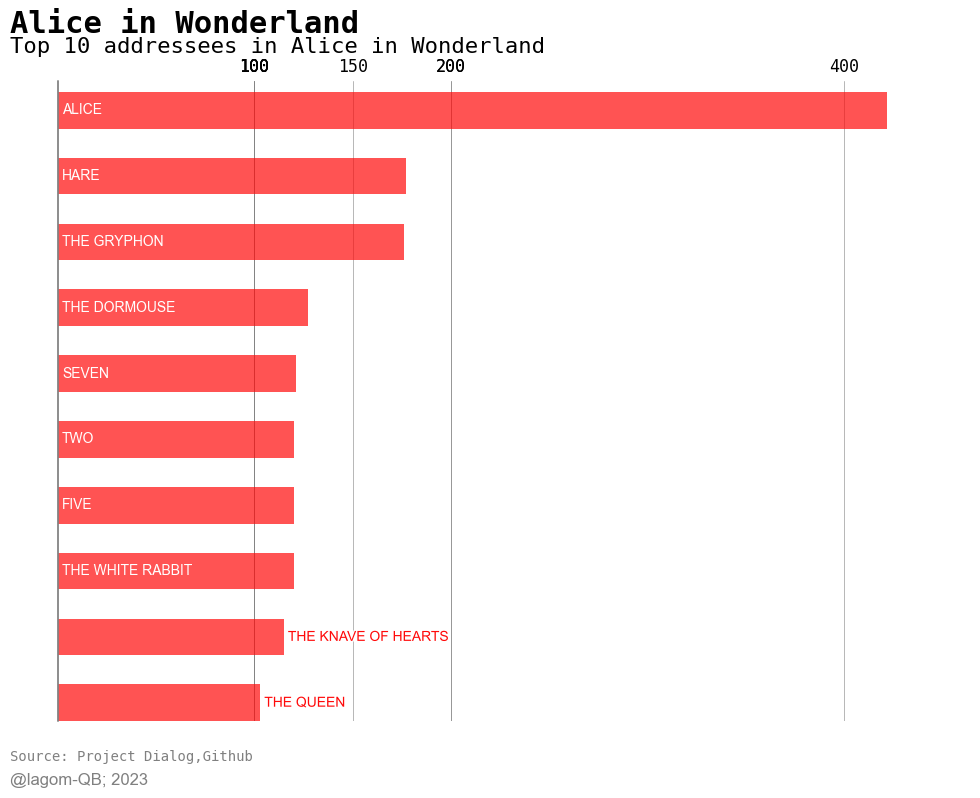

In [12]:
addresses = [item for item in quotes_src['addressees']]
addresses_cleaned = [s.strip("[]").split(',') for s in addresses]
addresses_flatten = [item.replace("'","") for sublist in addresses_cleaned for item in sublist if item != '']
# Take out the leading and trailing spaces
addresses_flatten = [item.strip() for item in addresses_flatten]

display(addresses_flatten)
"""pd.Series(addresses_flatten).value_counts().plot(kind='barh', 
                                                 figsize=(14, 10), 
                                                 title='Top 10 addressees', 
                                                 color='orange')"""

fig, ax = plt.subplots(figsize=(12, 8))

# Convert the Counter object to a dataframe
addresseesCount = pd.DataFrame.from_dict(Counter(addresses_flatten),
                                         orient='index',
                                         columns=['count']).reset_index()
addresseesCount.rename(columns={'index': 'Value'}, inplace=True)
# Sort the dataframe by the count column
addresseesCount = addresseesCount.sort_values(by='count', ascending=True).reset_index(drop=True)

topN = 10
topNWords = addresseesCount.tail(topN).reset_index(drop=True)
# Get the y positions for the labels
y = [i*.9 for i in range(len(topNWords['Value']))]
display(topNWords)

ax.barh(y= y,
        width=topNWords['count'], 
        color='#ff0a0a', 
        height=0.5, 
        align='edge', 
        alpha=0.7)

unique_counts = topNWords['count'].unique()
tick_locations = np.round(unique_counts/50)*50

# Customize the plot
ax.xaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)
ax.xaxis.set_ticks(ticks=tick_locations)
ax.xaxis.set_ticklabels([int(loc) for loc in tick_locations], 
                        size=12, 
                        fontfamily="monospace", 
                        fontweight=100)
ax.set_xlim((0, 1.1 * max(topNWords['count'])))
ax.set_ylim((0, len(topNWords.Value)*.9-.25))

ax.set_axisbelow(True)
ax.grid(axis='x', color='grey', lw=.4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_lw(1.4)
ax.spines['left'].set_color('grey')
ax.spines['left'].set_alpha(.9)
ax.spines['left'].set_capstyle('round')

#---Labels---
ax.yaxis.set_visible(False)
PADDING = 2
# Add the word labels in the middle of the bars
for words, count, y_pos in zip(topNWords['Value'], topNWords['count'], y):
        x = 0
        color = 'white'
        path_effects = None
        # make words uppercase
        words = words.upper()
        if count < 120:
            x = count
            color = '#ff0a0a'
            path_effects=[withStroke(linewidth=2, foreground='white')]

        ax.text(x=x + PADDING, 
                y=y_pos + .5/2, 
                s=words, 
                size=10,
                color=color,
                va='center',
                path_effects=path_effects, 
                fontfamily="arial", 
                fontweight=100)
        
#Room for the title
fig.subplots_adjust(top=0.9, left=0.14, bottom=0.1, right=0.9)
# Add the title
fig.text(x=0.1, 
         y=0.96, 
         s="Alice in Wonderland", 
         fontsize=22, 
         fontweight='bold', 
         fontfamily="monospace")
# Add the subtitle
fig.text(x=0.1,
         y=0.935,
         s="Top 10 addressees in Alice in Wonderland",
         fontsize=16,
         fontfamily="monospace")
# Add the source and caption
fig.text(x=0.1,
         y=0.05,
         s="Source: Project Dialog,Github",
         color='grey',
         fontsize=10,
         fontfamily="monospace")
# Add author
fig.text(x=0.1,
         y=0.02,
         s="@lagom-QB; 2023",
         fontsize=12, 
         fontfamily="Arial", 
         color="grey")

plt.savefig('images/top10_addressees.svg')

,Value,count
0,The Queen,23
1,The King Of Hearts,24
2,The White Rabbit,24
3,The Cat,25
4,The Mock Turtle,35
5,The Hatter,39
6,Alice,40
7,The Dormouse,41
8,Hare,52
9,The Gryphon,53


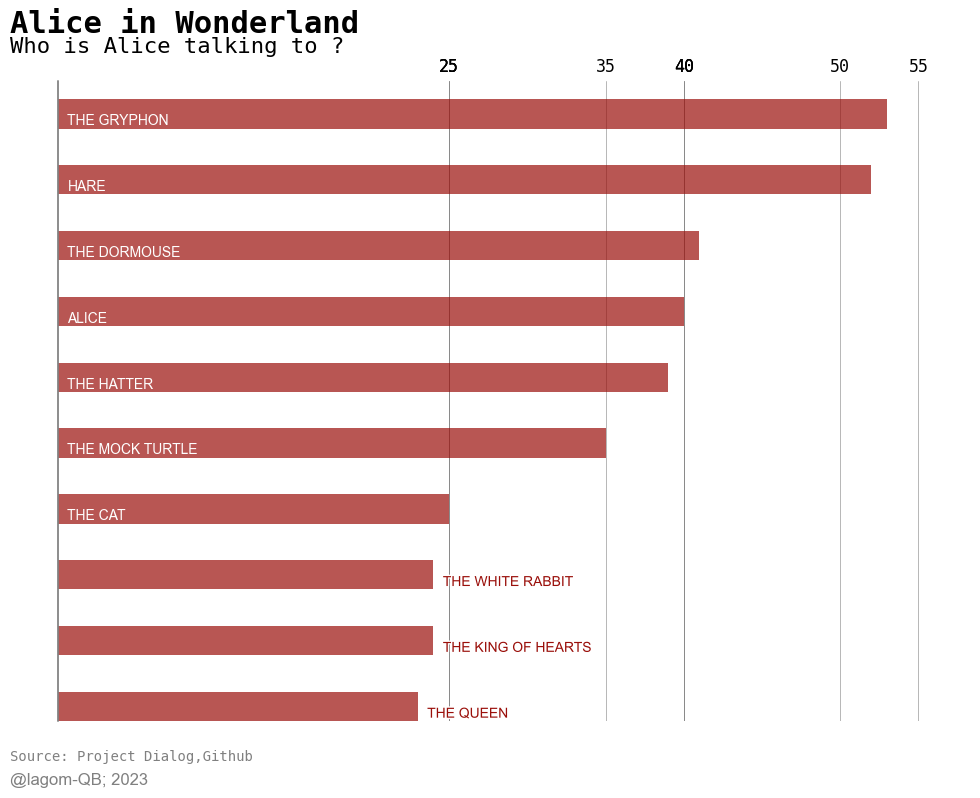

In [26]:
# Who does Alice speak to the most?
alice_talks = quotes_src[quotes_src['speaker'] == 'Alice']
alice_addressees = [item.replace("'","") for sublist in [s.strip("[]").split(',') 
                                                         for s in [item 
                                                                   for item in alice_talks['addressees']]] 
                                                                   for item in sublist if item != '']
# Delete the leading and trailing spaces
alice_addressees = [item.strip() for item in alice_addressees]

fig, ax = plt.subplots(figsize=(12, 8))

# Convert the Counter object to a dataframe
alice_addresseesCount = pd.DataFrame.from_dict(Counter(alice_addressees),
                                         orient='index',
                                         columns=['count']).reset_index()
alice_addresseesCount.rename(columns={'index': 'Value'}, inplace=True)
# Sort the dataframe by the count column
alice_addresseesCount = alice_addresseesCount.sort_values(by='count', ascending=True).reset_index(drop=True)

topN = 10
topNWords = alice_addresseesCount.tail(topN).reset_index(drop=True)
# Get the y positions for the labels
y = [i*.9 for i in range(len(topNWords['Value']))]
display(topNWords)

ax.barh(y= y,
        width=topNWords['count'], 
        color='#9a0f0a', 
        height=0.4, 
        align='edge', 
        alpha=0.7)

unique_counts = topNWords['count'].unique()
tick_locations = np.round(unique_counts/5)*5

# Customize the plot
ax.xaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)
ax.xaxis.set_ticks(ticks=tick_locations)
ax.xaxis.set_ticklabels([int(loc) for loc in tick_locations], 
                        size=12, 
                        fontfamily="monospace", 
                        fontweight=100)
ax.set_xlim((0, 1.1 * max(topNWords['count'])))
ax.set_ylim((0, len(topNWords.Value)*.9-.25))

ax.set_axisbelow(True)
ax.grid(axis='x', color='grey', lw=.4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_lw(1.4)
ax.spines['left'].set_color('grey')
ax.spines['left'].set_alpha(.9)
ax.spines['left'].set_capstyle('round')

#---Labels---
ax.yaxis.set_visible(False)
PADDING = .6
# Add the word labels in the middle of the bars
for words, count, y_pos in zip(topNWords['Value'], topNWords['count'], y):
        x = 0
        color = 'white'
        path_effects = None
        # make words uppercase
        words = words.upper()
        if count < 25:
            x = count
            color = '#9a0f0a'
            path_effects=[withStroke(linewidth=2, foreground='white')]

        ax.text(x=x + PADDING, 
                y=y_pos + .2/2, 
                s=words, 
                size=10,
                color=color,
                va='center',
                path_effects=path_effects, 
                fontfamily="arial", 
                fontweight=100)
        
#Room for the title
fig.subplots_adjust(top=0.9, left=0.14, bottom=0.1, right=0.9)
# Add the title
fig.text(x=0.1, 
         y=0.96, 
         s="Alice in Wonderland", 
         fontsize=22, 
         fontweight='bold', 
         fontfamily="monospace")
# Add the subtitle
fig.text(x=0.1,
         y=0.935,
         s="Who is Alice talking to ?",
         fontsize=16,
         fontfamily="monospace")
# Add the source and caption
fig.text(x=0.1,
         y=0.05,
         s="Source: Project Dialog,Github",
         color='grey',
         fontsize=10,
         fontfamily="monospace")
# Add author
fig.text(x=0.1,
         y=0.02,
         s="@lagom-QB; 2023",
         fontsize=12, 
         fontfamily="Arial", 
         color="grey")

plt.savefig('images/alice_addressees.svg')

,Value,count
0,Bill,41
1,The Lizard,41
2,The Gryphon,41
3,The White Rabbit,43
4,The Knave Of Hearts,43
5,Seven,43
6,Two,43
7,Five,43
8,The Queen,45
9,Alice,49


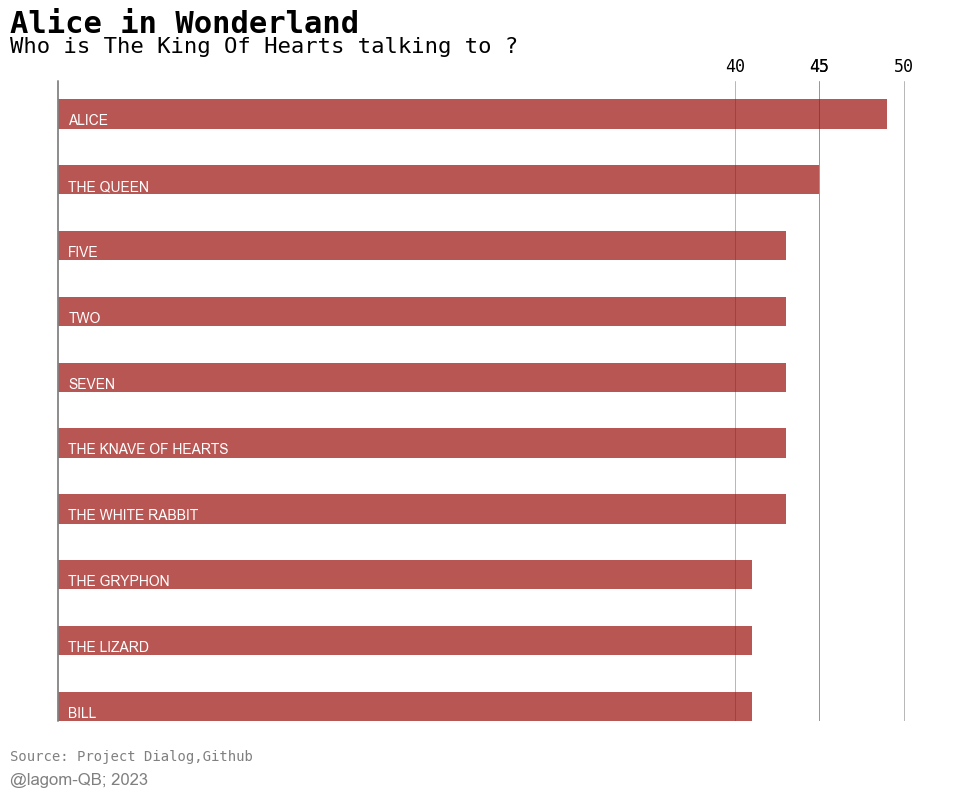

In [20]:
# Who does koh speak to the most?
koh_talks = quotes_src[quotes_src['speaker'] == 'The King Of Hearts']
koh_addressees = [item.replace("'","") for sublist in [s.strip("[]").split(',') 
                                                         for s in [item 
                                                                   for item in koh_talks['addressees']]] 
                                                                   for item in sublist if item != '']
# Delete the leading and trailing spaces
koh_addressees = [item.strip() for item in koh_addressees]

fig, ax = plt.subplots(figsize=(12, 8))

# Convert the Counter object to a dataframe
koh_addresseesCount = pd.DataFrame.from_dict(Counter(koh_addressees),
                                         orient='index',
                                         columns=['count']).reset_index()
koh_addresseesCount.rename(columns={'index': 'Value'}, inplace=True)
# Sort the dataframe by the count column
koh_addresseesCount = koh_addresseesCount.sort_values(by='count', ascending=True).reset_index(drop=True)

topN = 10
topNWords = koh_addresseesCount.tail(topN).reset_index(drop=True)
# Get the y positions for the labels
y = [i*.9 for i in range(len(topNWords['Value']))]
display(topNWords)

ax.barh(y= y,
        width=topNWords['count'], 
        color='#9a0f0a', 
        height=0.4, 
        align='edge', 
        alpha=0.7)

unique_counts = topNWords['count'].unique()
tick_locations = np.round(unique_counts/5)*5

# Customize the plot
ax.xaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)
ax.xaxis.set_ticks(ticks=tick_locations)
ax.xaxis.set_ticklabels([int(loc) for loc in tick_locations], 
                        size=12, 
                        fontfamily="monospace", 
                        fontweight=100)
ax.set_xlim((0, 1.1 * max(topNWords['count'])))
ax.set_ylim((0, len(topNWords.Value)*.9-.25))

ax.set_axisbelow(True)
ax.grid(axis='x', color='grey', lw=.4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_lw(1.4)
ax.spines['left'].set_color('grey')
ax.spines['left'].set_alpha(.9)
ax.spines['left'].set_capstyle('round')

#---Labels---
ax.yaxis.set_visible(False)
PADDING = .6
# Add the word labels in the middle of the bars
for words, count, y_pos in zip(topNWords['Value'], topNWords['count'], y):
        x = 0
        color = 'white'
        path_effects = None
        # make words uppercase
        words = words.upper()
        if count < 25:
            x = count
            color = '#9a0f0a'
            path_effects=[withStroke(linewidth=2, foreground='white')]

        ax.text(x=x + PADDING, 
                y=y_pos + .2/2, 
                s=words, 
                size=10,
                color=color,
                va='center',
                path_effects=path_effects, 
                fontfamily="arial", 
                fontweight=100)
        
#Room for the title
fig.subplots_adjust(top=0.9, left=0.14, bottom=0.1, right=0.9)
# Add the title
fig.text(x=0.1, 
         y=0.96, 
         s="Alice in Wonderland", 
         fontsize=22, 
         fontweight='bold', 
         fontfamily="monospace")
# Add the subtitle
fig.text(x=0.1,
         y=0.935,
         s="Who is The King Of Hearts talking to ?",
         fontsize=16,
         fontfamily="monospace")
# Add the source and caption
fig.text(x=0.1,
         y=0.05,
         s="Source: Project Dialog,Github",
         color='grey',
         fontsize=10,
         fontfamily="monospace")
# Add author
fig.text(x=0.1,
         y=0.02,
         s="@lagom-QB; 2023",
         fontsize=12, 
         fontfamily="Arial", 
         color="grey")

plt.savefig('images/koh_addressees.svg')

,Value,count
0,Alice,42
1,The Gryphon,42


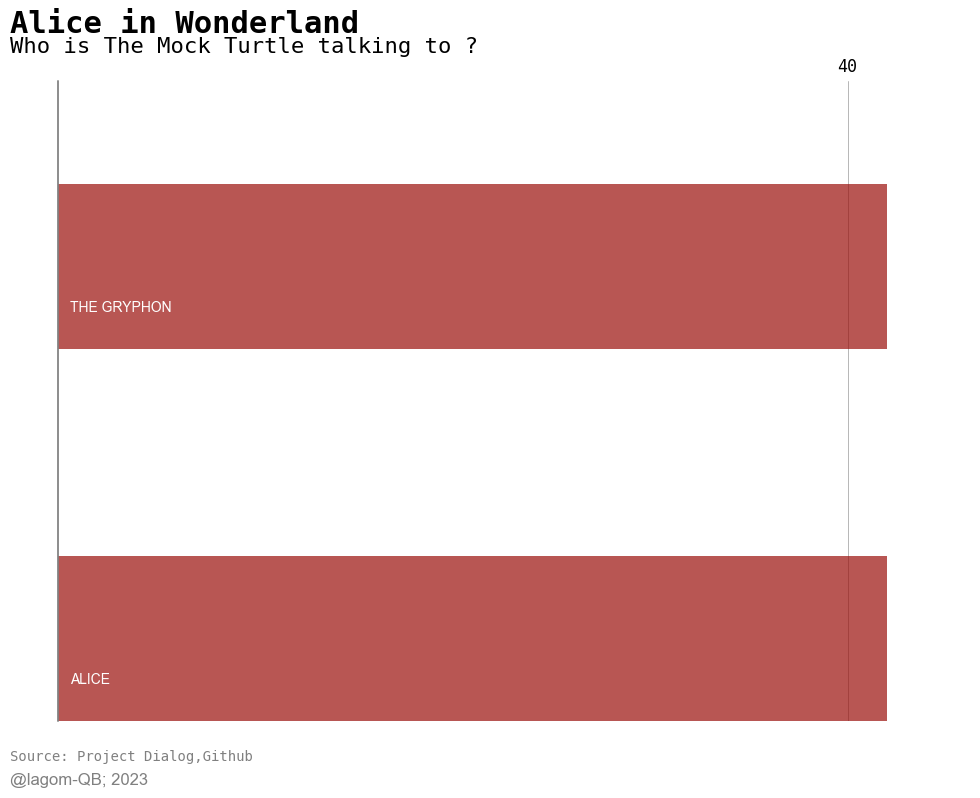

In [21]:
# Who does tmt speak to the most?
tmt_talks = quotes_src[quotes_src['speaker'] == 'The Mock Turtle']
tmt_addressees = [item.replace("'","") for sublist in [s.strip("[]").split(',') 
                                                         for s in [item 
                                                                   for item in tmt_talks['addressees']]] 
                                                                   for item in sublist if item != '']
# Delete the leading and trailing spaces
tmt_addressees = [item.strip() for item in tmt_addressees]

fig, ax = plt.subplots(figsize=(12, 8))

# Convert the Counter object to a dataframe
tmt_addresseesCount = pd.DataFrame.from_dict(Counter(tmt_addressees),
                                         orient='index',
                                         columns=['count']).reset_index()
tmt_addresseesCount.rename(columns={'index': 'Value'}, inplace=True)
# Sort the dataframe by the count column
tmt_addresseesCount = tmt_addresseesCount.sort_values(by='count', ascending=True).reset_index(drop=True)

topN = 10
topNWords = tmt_addresseesCount.tail(topN).reset_index(drop=True)
# Get the y positions for the labels
y = [i*.9 for i in range(len(topNWords['Value']))]
display(topNWords)

ax.barh(y= y,
        width=topNWords['count'], 
        color='#9a0f0a', 
        height=0.4, 
        align='edge', 
        alpha=0.7)

unique_counts = topNWords['count'].unique()
tick_locations = np.round(unique_counts/5)*5

# Customize the plot
ax.xaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)
ax.xaxis.set_ticks(ticks=tick_locations)
ax.xaxis.set_ticklabels([int(loc) for loc in tick_locations], 
                        size=12, 
                        fontfamily="monospace", 
                        fontweight=100)
ax.set_xlim((0, 1.1 * max(topNWords['count'])))
ax.set_ylim((0, len(topNWords.Value)*.9-.25))

ax.set_axisbelow(True)
ax.grid(axis='x', color='grey', lw=.4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_lw(1.4)
ax.spines['left'].set_color('grey')
ax.spines['left'].set_alpha(.9)
ax.spines['left'].set_capstyle('round')

#---Labels---
ax.yaxis.set_visible(False)
PADDING = .6
# Add the word labels in the middle of the bars
for words, count, y_pos in zip(topNWords['Value'], topNWords['count'], y):
        x = 0
        color = 'white'
        path_effects = None
        # make words uppercase
        words = words.upper()
        if count < 25:
            x = count
            color = '#9a0f0a'
            path_effects=[withStroke(linewidth=2, foreground='white')]

        ax.text(x=x + PADDING, 
                y=y_pos + .2/2, 
                s=words, 
                size=10,
                color=color,
                va='center',
                path_effects=path_effects, 
                fontfamily="arial", 
                fontweight=100)
        
#Room for the title
fig.subplots_adjust(top=0.9, left=0.14, bottom=0.1, right=0.9)
# Add the title
fig.text(x=0.1, 
         y=0.96, 
         s="Alice in Wonderland", 
         fontsize=22, 
         fontweight='bold', 
         fontfamily="monospace")
# Add the subtitle
fig.text(x=0.1,
         y=0.935,
         s="Who is The Mock Turtle talking to ?",
         fontsize=16,
         fontfamily="monospace")
# Add the source and caption
fig.text(x=0.1,
         y=0.05,
         s="Source: Project Dialog,Github",
         color='grey',
         fontsize=10,
         fontfamily="monospace")
# Add author
fig.text(x=0.1,
         y=0.02,
         s="@lagom-QB; 2023",
         fontsize=12, 
         fontfamily="Arial", 
         color="grey")

plt.savefig('images/tmt_addressees.svg')

,Value,count
0,The Mock Turtle,37
1,Alice,42


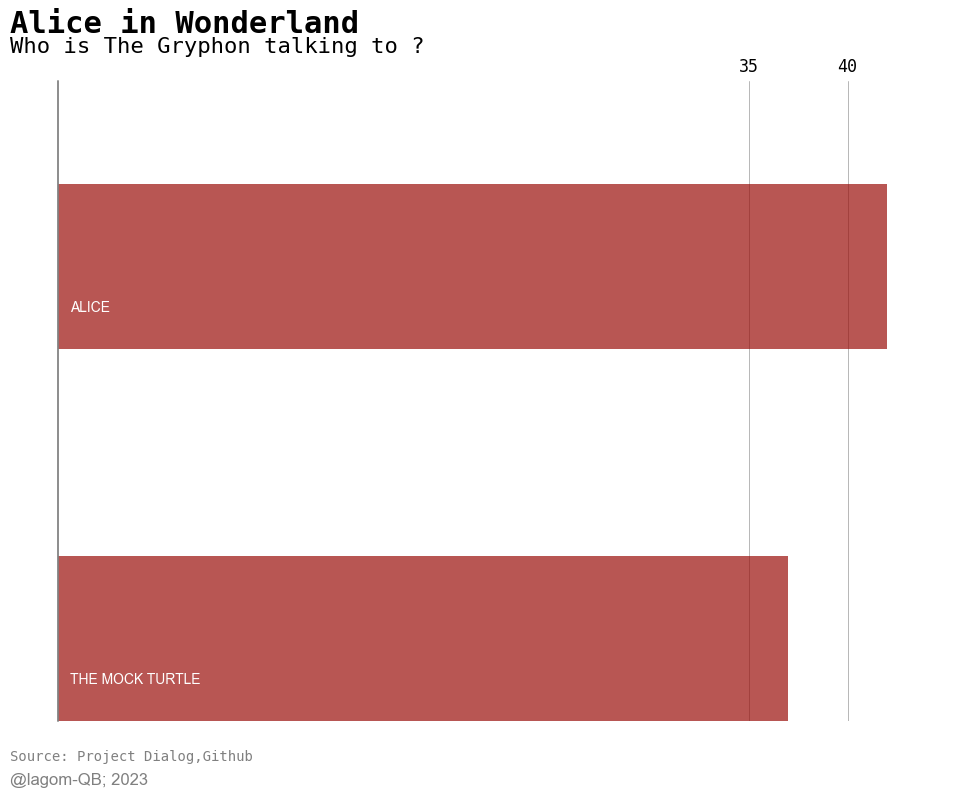

In [22]:
# Who does tg speak to the most?
tg_talks = quotes_src[quotes_src['speaker'] == 'The Gryphon']
tg_addressees = [item.replace("'","") for sublist in [s.strip("[]").split(',') 
                                                         for s in [item 
                                                                   for item in tg_talks['addressees']]] 
                                                                   for item in sublist if item != '']
# Delete the leading and trailing spaces
tg_addressees = [item.strip() for item in tg_addressees]

fig, ax = plt.subplots(figsize=(12, 8))

# Convert the Counter object to a dataframe
tg_addresseesCount = pd.DataFrame.from_dict(Counter(tg_addressees),
                                         orient='index',
                                         columns=['count']).reset_index()
tg_addresseesCount.rename(columns={'index': 'Value'}, inplace=True)
# Sort the dataframe by the count column
tg_addresseesCount = tg_addresseesCount.sort_values(by='count', ascending=True).reset_index(drop=True)

topN = 10
topNWords = tg_addresseesCount.tail(topN).reset_index(drop=True)
# Get the y positions for the labels
y = [i*.9 for i in range(len(topNWords['Value']))]
display(topNWords)

ax.barh(y= y,
        width=topNWords['count'], 
        color='#9a0f0a', 
        height=0.4, 
        align='edge', 
        alpha=0.7)

unique_counts = topNWords['count'].unique()
tick_locations = np.round(unique_counts/5)*5

# Customize the plot
ax.xaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)
ax.xaxis.set_ticks(ticks=tick_locations)
ax.xaxis.set_ticklabels([int(loc) for loc in tick_locations], 
                        size=12, 
                        fontfamily="monospace", 
                        fontweight=100)
ax.set_xlim((0, 1.1 * max(topNWords['count'])))
ax.set_ylim((0, len(topNWords.Value)*.9-.25))

ax.set_axisbelow(True)
ax.grid(axis='x', color='grey', lw=.4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_lw(1.4)
ax.spines['left'].set_color('grey')
ax.spines['left'].set_alpha(.9)
ax.spines['left'].set_capstyle('round')

#---Labels---
ax.yaxis.set_visible(False)
PADDING = .6
# Add the word labels in the middle of the bars
for words, count, y_pos in zip(topNWords['Value'], topNWords['count'], y):
        x = 0
        color = 'white'
        path_effects = None
        # make words uppercase
        words = words.upper()
        if count < 25:
            x = count
            color = '#9a0f0a'
            path_effects=[withStroke(linewidth=2, foreground='white')]

        ax.text(x=x + PADDING, 
                y=y_pos + .2/2, 
                s=words, 
                size=10,
                color=color,
                va='center',
                path_effects=path_effects, 
                fontfamily="arial", 
                fontweight=100)
        
#Room for the title
fig.subplots_adjust(top=0.9, left=0.14, bottom=0.1, right=0.9)
# Add the title
fig.text(x=0.1, 
         y=0.96, 
         s="Alice in Wonderland", 
         fontsize=22, 
         fontweight='bold', 
         fontfamily="monospace")
# Add the subtitle
fig.text(x=0.1,
         y=0.935,
         s="Who is The Gryphon talking to ?",
         fontsize=16,
         fontfamily="monospace")
# Add the source and caption
fig.text(x=0.1,
         y=0.05,
         s="Source: Project Dialog,Github",
         color='grey',
         fontsize=10,
         fontfamily="monospace")
# Add author
fig.text(x=0.1,
         y=0.02,
         s="@lagom-QB; 2023",
         fontsize=12, 
         fontfamily="Arial", 
         color="grey")

plt.savefig('images/tg_addressees.svg')

,Value,count
0,The Lizard,14
1,The Knave Of Hearts,14
2,Seven,14
3,The Gryphon,14
4,Two,14
5,Five,14
6,The Queen,14
7,The Dormouse,41
8,Hare,42
9,Alice,42


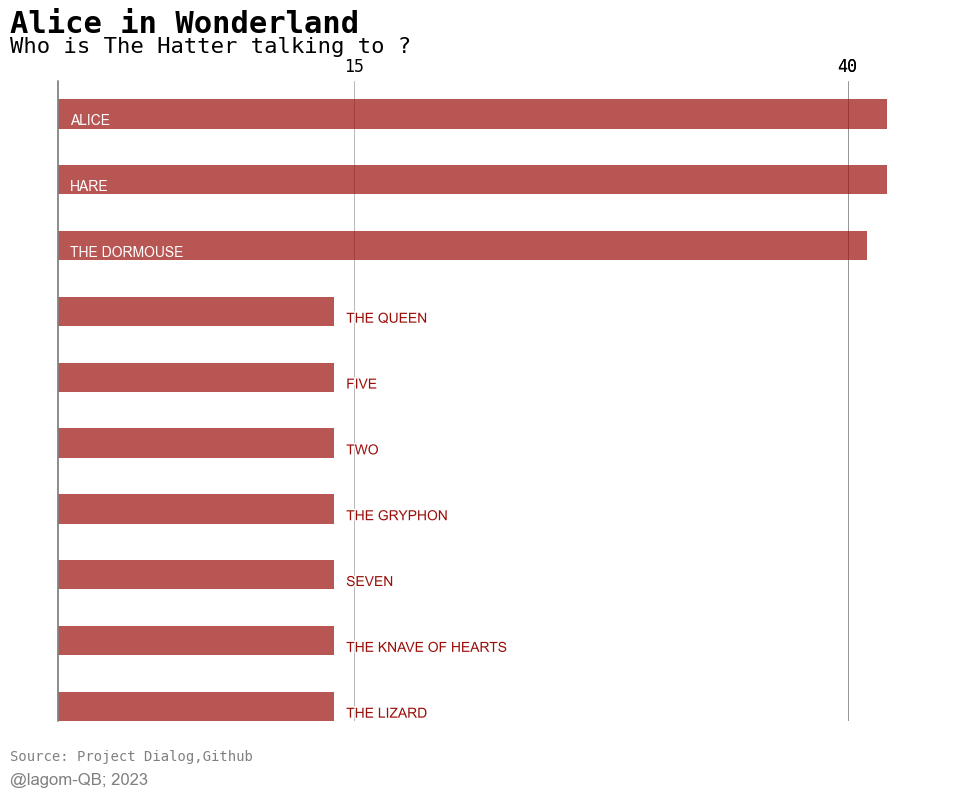

In [24]:
# Who does th speak to the most?
th_talks = quotes_src[quotes_src['speaker'] == 'The Hatter']
th_addressees = [item.replace("'","") for sublist in [s.strip("[]").split(',') 
                                                         for s in [item 
                                                                   for item in th_talks['addressees']]] 
                                                                   for item in sublist if item != '']
# Delete the leading and trailing spaces
th_addressees = [item.strip() for item in th_addressees]

fig, ax = plt.subplots(figsize=(12, 8))

# Convert the Counter object to a dataframe
th_addresseesCount = pd.DataFrame.from_dict(Counter(th_addressees),
                                         orient='index',
                                         columns=['count']).reset_index()
th_addresseesCount.rename(columns={'index': 'Value'}, inplace=True)
# Sort the dataframe by the count column
th_addresseesCount = th_addresseesCount.sort_values(by='count', ascending=True).reset_index(drop=True)

topN = 10
topNWords = th_addresseesCount.tail(topN).reset_index(drop=True)
# Get the y positions for the labels
y = [i*.9 for i in range(len(topNWords['Value']))]
display(topNWords)

ax.barh(y= y,
        width=topNWords['count'], 
        color='#9a0f0a', 
        height=0.4, 
        align='edge', 
        alpha=0.7)

unique_counts = topNWords['count'].unique()
tick_locations = np.round(unique_counts/5)*5

# Customize the plot
ax.xaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)
ax.xaxis.set_ticks(ticks=tick_locations)
ax.xaxis.set_ticklabels([int(loc) for loc in tick_locations], 
                        size=12, 
                        fontfamily="monospace", 
                        fontweight=100)
ax.set_xlim((0, 1.1 * max(topNWords['count'])))
ax.set_ylim((0, len(topNWords.Value)*.9-.25))

ax.set_axisbelow(True)
ax.grid(axis='x', color='grey', lw=.4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_lw(1.4)
ax.spines['left'].set_color('grey')
ax.spines['left'].set_alpha(.9)
ax.spines['left'].set_capstyle('round')

#---Labels---
ax.yaxis.set_visible(False)
PADDING = .6
# Add the word labels in the middle of the bars
for words, count, y_pos in zip(topNWords['Value'], topNWords['count'], y):
        x = 0
        color = 'white'
        path_effects = None
        # make words uppercase
        words = words.upper()
        if count < 25:
            x = count
            color = '#9a0f0a'
            path_effects=[withStroke(linewidth=2, foreground='white')]

        ax.text(x=x + PADDING, 
                y=y_pos + .2/2, 
                s=words, 
                size=10,
                color=color,
                va='center',
                path_effects=path_effects, 
                fontfamily="arial", 
                fontweight=100)
        
#Room for the title
fig.subplots_adjust(top=0.9, left=0.14, bottom=0.1, right=0.9)
# Add the title
fig.text(x=0.1, 
         y=0.96, 
         s="Alice in Wonderland", 
         fontsize=22, 
         fontweight='bold', 
         fontfamily="monospace")
# Add the subtitle
fig.text(x=0.1,
         y=0.935,
         s="Who is The Hatter talking to ?",
         fontsize=16,
         fontfamily="monospace")
# Add the source and caption
fig.text(x=0.1,
         y=0.05,
         s="Source: Project Dialog,Github",
         color='grey',
         fontsize=10,
         fontfamily="monospace")
# Add author
fig.text(x=0.1,
         y=0.02,
         s="@lagom-QB; 2023",
         fontsize=12, 
         fontfamily="Arial", 
         color="grey")

plt.savefig('images/th_addressees.svg')

In [23]:
# What is The Gryphon talking about?
from bertopic import BERTopic

topic_model = BERTopic.load("davanstrien/chat_topics")
topic_modelling_df = pd.DataFrame(columns=['text', 'topic', 'probability'])

# Go through the quotes_src and get each quoteText 
for row in quotes_src.itertuples():
    if row.speaker == 'The Gryphon' and row.quoteText != ' ':
        topic, prob = topic_model.transform([row.quoteText])
        most_probable_topic = max(topic_model.get_topic(topic[0]))

        text = row.quoteText
        topic = most_probable_topic[0]
        prob = most_probable_topic[1]

        # Save the quoteText, topic, and probability to the topic_modelling_df
        new_row = {'text': [text], 'topic': [topic], 'probability': [prob]}
        new_df = pd.DataFrame.from_dict(new_row, orient='index').T
        topic_modelling_df = pd.concat([topic_modelling_df, new_df], ignore_index=True)

display(topic_modelling_df)

# Visualize 

fig, ax = plt.subplots(figsize=(12, 8))

topics_counts = topic_modelling_df.value_counts('topic').reset_index(name='count')
# Filter out the topic with counts less than 10
topics_counts = topics_counts[topics_counts['count'] > 5]

topN = 5
topNWords = topics_counts.iloc[::-1]
# Get the y positions for the labels
y = [i*.9 for i in range(len(topNWords['count']))]
display(topNWords)

ax.barh(y= y,
        width=topNWords['count'], 
        color='#1a1afa', 
        height=0.4, 
        align='edge', 
        alpha=0.7)

unique_counts = topNWords['count'].unique()
tick_locations = np.round(unique_counts/5)*5

# Customize the plot
ax.xaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)
ax.xaxis.set_ticks(ticks=tick_locations)
ax.xaxis.set_ticklabels([int(loc) for loc in tick_locations], 
                        size=12, 
                        fontfamily="monospace", 
                        fontweight=100)
ax.set_xlim((0, 1.1 * max(topNWords['count'])))
ax.set_ylim((0, len(topNWords['count'])*.9-.25))

ax.set_axisbelow(True)
ax.grid(axis='x', color='grey', lw=.4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_lw(1.4)
ax.spines['left'].set_color('grey')
ax.spines['left'].set_alpha(.9)
ax.spines['left'].set_capstyle('round')

#---Labels---
ax.yaxis.set_visible(False)
PADDING = .6
# Add the word labels in the middle of the bars
for words, count, y_pos in zip(topNWords['topic'], topNWords['count'], y):
        x = 0
        color = 'white'
        path_effects = None
        # make words uppercase
        words = words.upper()
        if count < 25:
            x = count
            color = '#1a1afa'
            path_effects=[withStroke(linewidth=2, foreground='white')]

        ax.text(x=x + PADDING, 
                y=y_pos + .2/2, 
                s=words, 
                size=10,
                color=color,
                va='center',
                path_effects=path_effects, 
                fontfamily="arial", 
                fontweight=100)
        
#Room for the title
fig.subplots_adjust(top=0.9, left=0.14, bottom=0.1, right=0.9)
# Add the title
fig.text(x=0.1, 
         y=0.96, 
         s="Alice in Wonderland", 
         fontsize=22, 
         fontweight='bold', 
         fontfamily="monospace")
# Add the subtitle
fig.text(x=0.1,
         y=0.935,
         s="What is the gryphon talking about?",
         fontsize=16,
         fontfamily="monospace")
# Add the source and caption
fig.text(x=0.1,
         y=0.05,
         s="Source: Project Dialog,Github",
         color='grey',
         fontsize=10,
         fontfamily="monospace")
# Add author
fig.text(x=0.1,
         y=0.02,
         s="@lagom-QB; 2023",
         fontsize=12, 
         fontfamily="Arial", 
         color="grey")

plt.savefig('images/gryphon.svg')

2023-08-13 22:21:17.756834: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
# What is Hare talking about?
from bertopic import BERTopic

topic_model = BERTopic.load("davanstrien/chat_topics")
topic_modelling_df = pd.DataFrame(columns=['text', 'topic', 'probability'])

# Go through the quotes_src and get each quoteText 
for row in quotes_src.itertuples():
    if row.speaker == 'Hare' and row.quoteText != ' ':
        topic, prob = topic_model.transform([row.quoteText])
        most_probable_topic = max(topic_model.get_topic(topic[0]))

        text = row.quoteText
        topic = most_probable_topic[0]
        prob = most_probable_topic[1]

        # Save the quoteText, topic, and probability to the topic_modelling_df
        new_row = {'text': [text], 'topic': [topic], 'probability': [prob]}
        new_df = pd.DataFrame.from_dict(new_row, orient='index').T
        topic_modelling_df = pd.concat([topic_modelling_df, new_df], ignore_index=True)

display(topic_modelling_df)

# Visualize 

fig, ax = plt.subplots(figsize=(12, 8))

topics_counts = topic_modelling_df.value_counts('topic').reset_index(name='count')
# Filter out the topic with counts less than 10
# topics_counts = topics_counts[topics_counts['count'] > 5]

topN = 5
topNWords = topics_counts.iloc[::-1]
# Get the y positions for the labels
y = [i*.9 for i in range(len(topNWords['count']))]
display(topNWords)

ax.barh(y= y,
        width=topNWords['count'], 
        color='#1a1afa', 
        height=0.4, 
        align='edge', 
        alpha=0.7)

unique_counts = topNWords['count'].unique()
tick_locations = np.round(unique_counts/5)*5

# Customize the plot
ax.xaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)
ax.xaxis.set_ticks(ticks=tick_locations)
ax.xaxis.set_ticklabels([int(loc) for loc in tick_locations], 
                        size=12, 
                        fontfamily="monospace", 
                        fontweight=100)
ax.set_xlim((0, 1.1 * max(topNWords['count'])))
ax.set_ylim((0, len(topNWords['count'])*.9-.25))

ax.set_axisbelow(True)
ax.grid(axis='x', color='grey', lw=.4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_lw(1.4)
ax.spines['left'].set_color('grey')
ax.spines['left'].set_alpha(.9)
ax.spines['left'].set_capstyle('round')

#---Labels---
ax.yaxis.set_visible(False)
PADDING = .1
# Add the word labels in the middle of the bars
for words, count, y_pos in zip(topNWords['topic'], topNWords['count'], y):
        x = 0
        color = 'white'
        path_effects = None
        # make words uppercase
        words = words.upper()
        if count < 2:
            x = count
            color = '#1a1afa'
            path_effects=[withStroke(linewidth=2, foreground='white')]

        ax.text(x=x + PADDING, 
                y=y_pos + .2/2, 
                s=words, 
                size=10,
                color=color,
                va='center',
                path_effects=path_effects, 
                fontfamily="arial", 
                fontweight=100)
        
#Room for the title
fig.subplots_adjust(top=0.9, left=0.14, bottom=0.1, right=0.9)
# Add the title
fig.text(x=0.1, 
         y=0.96, 
         s="Alice in Wonderland", 
         fontsize=22, 
         fontweight='bold', 
         fontfamily="monospace")
# Add the subtitle
fig.text(x=0.1,
         y=0.935,
         s="What is Hare talking about?",
         fontsize=16,
         fontfamily="monospace")
# Add the source and caption
fig.text(x=0.1,
         y=0.05,
         s="Source: Project Dialog,Github",
         color='grey',
         fontsize=10,
         fontfamily="monospace")
# Add author
fig.text(x=0.1,
         y=0.02,
         s="@lagom-QB; 2023",
         fontsize=12, 
         fontfamily="Arial", 
         color="grey")

plt.savefig('images/hare.svg')

In [ ]:
# What is The Dormouse talking about?
from bertopic import BERTopic

topic_model = BERTopic.load("davanstrien/chat_topics")
topic_modelling_df = pd.DataFrame(columns=['text', 'topic', 'probability'])

# Go through the quotes_src and get each quoteText 
for row in quotes_src.itertuples():
    if row.speaker == 'The Dormouse' and row.quoteText != ' ':
        topic, prob = topic_model.transform([row.quoteText])
        most_probable_topic = max(topic_model.get_topic(topic[0]))

        text = row.quoteText
        topic = most_probable_topic[0]
        prob = most_probable_topic[1]

        # Save the quoteText, topic, and probability to the topic_modelling_df
        new_row = {'text': [text], 'topic': [topic], 'probability': [prob]}
        new_df = pd.DataFrame.from_dict(new_row, orient='index').T
        topic_modelling_df = pd.concat([topic_modelling_df, new_df], ignore_index=True)

display(topic_modelling_df)

# Visualize 

fig, ax = plt.subplots(figsize=(12, 8))

topics_counts = topic_modelling_df.value_counts('topic').reset_index(name='count')
# Filter out the topic with counts less than 10
# topics_counts = topics_counts[topics_counts['count'] > 5]

topN = 5
topNWords = topics_counts.iloc[::-1]
# Get the y positions for the labels
y = [i*.9 for i in range(len(topNWords['count']))]
display(topNWords)

ax.barh(y= y,
        width=topNWords['count'], 
        color='#1a1afa', 
        height=0.4, 
        align='edge', 
        alpha=0.7)

unique_counts = topNWords['count'].unique()
tick_locations = np.round(unique_counts/2)*2

# Customize the plot
ax.xaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)
ax.xaxis.set_ticks(ticks=tick_locations)
ax.xaxis.set_ticklabels([int(loc) for loc in tick_locations], 
                        size=12, 
                        fontfamily="monospace", 
                        fontweight=100)
ax.set_xlim((0, 1.1 * max(topNWords['count'])))
ax.set_ylim((0, len(topNWords['count'])*.9-.25))

ax.set_axisbelow(True)
ax.grid(axis='x', color='grey', lw=.4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_lw(1.4)
ax.spines['left'].set_color('grey')
ax.spines['left'].set_alpha(.9)
ax.spines['left'].set_capstyle('round')

#---Labels---
ax.yaxis.set_visible(False)
PADDING = .02
# Add the word labels in the middle of the bars
for words, count, y_pos in zip(topNWords['topic'], topNWords['count'], y):
        x = 0
        color = 'white'
        path_effects = None
        # make words uppercase
        words = words.upper()
        if count < 2:
            x = count
            color = '#1a1afa'
            path_effects=[withStroke(linewidth=2, foreground='white')]

        ax.text(x=x + PADDING, 
                y=y_pos + .2/2, 
                s=words, 
                size=10,
                color=color,
                va='center',
                path_effects=path_effects, 
                fontfamily="arial", 
                fontweight=100)
        
#Room for the title
fig.subplots_adjust(top=0.9, left=0.14, bottom=0.1, right=0.9)
# Add the title
fig.text(x=0.1, 
         y=0.96, 
         s="Alice in Wonderland", 
         fontsize=22, 
         fontweight='bold', 
         fontfamily="monospace")
# Add the subtitle
fig.text(x=0.1,
         y=0.935,
         s="What is The Dormouse talking about?",
         fontsize=16,
         fontfamily="monospace")
# Add the source and caption
fig.text(x=0.1,
         y=0.05,
         s="Source: Project Dialog,Github",
         color='grey',
         fontsize=10,
         fontfamily="monospace")
# Add author
fig.text(x=0.1,
         y=0.02,
         s="@lagom-QB; 2023",
         fontsize=12, 
         fontfamily="Arial", 
         color="grey")

plt.savefig('images/dormouse.svg')

In [ ]:
# What is Alice talking about?
from bertopic import BERTopic

topic_model = BERTopic.load("davanstrien/chat_topics")
topic_modelling_df = pd.DataFrame(columns=['text', 'topic', 'probability'])

# Go through the quotes_src and get each quoteText 
for row in quotes_src.itertuples():
    if row.speaker == 'Alice' and row.quoteText != ' ':
        topic, prob = topic_model.transform([row.quoteText])
        most_probable_topic = max(topic_model.get_topic(topic[0]))

        text = row.quoteText
        topic = most_probable_topic[0]
        prob = most_probable_topic[1]

        # Save the quoteText, topic, and probability to the topic_modelling_df
        new_row = {'text': [text], 'topic': [topic], 'probability': [prob]}
        new_df = pd.DataFrame.from_dict(new_row, orient='index').T
        topic_modelling_df = pd.concat([topic_modelling_df, new_df], ignore_index=True)

display(topic_modelling_df)
# Visualize 

fig, ax = plt.subplots(figsize=(12, 8))

topics_counts = topic_modelling_df.value_counts('topic').reset_index(name='count')
# Filter out the topic with counts less than 10
topics_counts = topics_counts[topics_counts['count'] > 5]

topN = 5
topNWords = topics_counts.iloc[::-1]
# Get the y positions for the labels
y = [i*.9 for i in range(len(topNWords['count']))]
display(topNWords)

ax.barh(y= y,
        width=topNWords['count'], 
        color='#1a1afa', 
        height=0.4, 
        align='edge', 
        alpha=0.7)

unique_counts = topNWords['count'].unique()
tick_locations = np.round(unique_counts/5)*5

# Customize the plot
ax.xaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)
ax.xaxis.set_ticks(ticks=tick_locations)
ax.xaxis.set_ticklabels([int(loc) for loc in tick_locations], 
                        size=12, 
                        fontfamily="monospace", 
                        fontweight=100)
ax.set_xlim((0, 1.1 * max(topNWords['count'])))
ax.set_ylim((0, len(topNWords['count'])*.9-.25))

ax.set_axisbelow(True)
ax.grid(axis='x', color='grey', lw=.4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_lw(1.4)
ax.spines['left'].set_color('grey')
ax.spines['left'].set_alpha(.9)
ax.spines['left'].set_capstyle('round')

#---Labels---
ax.yaxis.set_visible(False)
PADDING = .6
# Add the word labels in the middle of the bars
for words, count, y_pos in zip(topNWords['topic'], topNWords['count'], y):
        x = 0
        color = 'white'
        path_effects = None
        # make words uppercase
        words = words.upper()
        if count < 25:
            x = count
            color = '#1a1afa'
            path_effects=[withStroke(linewidth=2, foreground='white')]

        ax.text(x=x + PADDING, 
                y=y_pos + .2/2, 
                s=words, 
                size=10,
                color=color,
                va='center',
                path_effects=path_effects, 
                fontfamily="arial", 
                fontweight=100)
        
#Room for the title
fig.subplots_adjust(top=0.9, left=0.14, bottom=0.1, right=0.9)
# Add the title
fig.text(x=0.1, 
         y=0.96, 
         s="Alice in Wonderland", 
         fontsize=22, 
         fontweight='bold', 
         fontfamily="monospace")
# Add the subtitle
fig.text(x=0.1,
         y=0.935,
         s="What is Alice talking about?",
         fontsize=16,
         fontfamily="monospace")
# Add the source and caption
fig.text(x=0.1,
         y=0.05,
         s="Source: Project Dialog,Github",
         color='grey',
         fontsize=10,
         fontfamily="monospace")
# Add author
fig.text(x=0.1,
         y=0.02,
         s="@lagom-QB; 2023",
         fontsize=12, 
         fontfamily="Arial", 
         color="grey")

plt.savefig('images/alice.svg')

,Value,count
0,Hare,10
1,The Lizard,10
2,The Knave Of Hearts,10
3,Seven,10
4,Two,10
5,Five,10
6,The King Of Hearts,10
7,The Queen,10
8,Bill,13
9,Alice,17


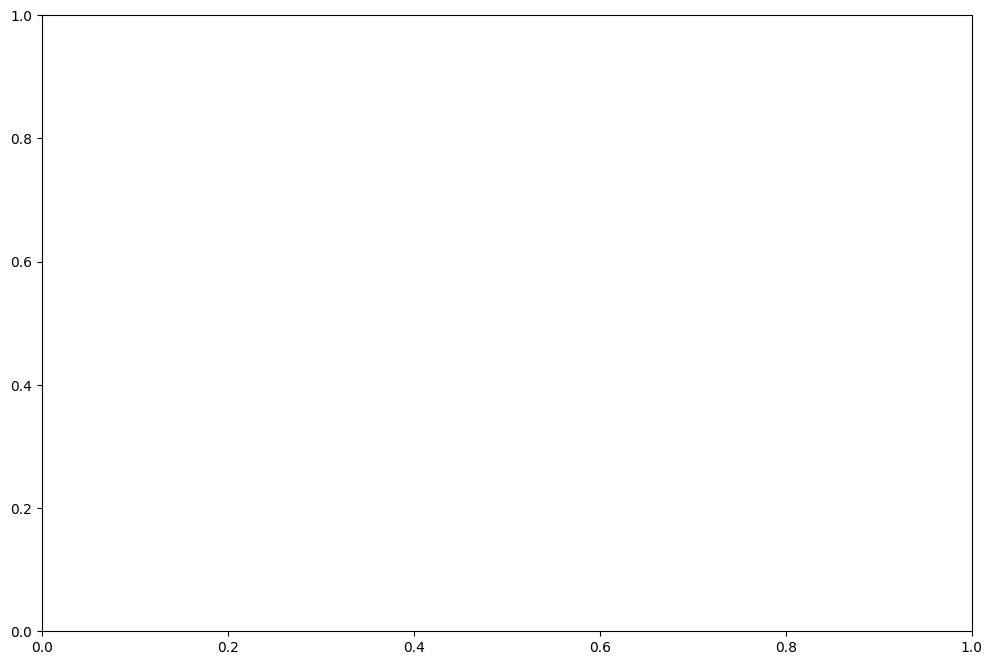

In [31]:
# Who does tmt speak to the most?
tmt_talks = quotes_src[quotes_src['speaker'] == 'The White Rabbit']
tmt_addressees = [item.replace("'","") for sublist in [s.strip("[]").split(',') 
                                                         for s in [item 
                                                                   for item in tmt_talks['addressees']]] 
                                                                   for item in sublist if item != '']
# Delete the leading and trailing spaces
tmt_addressees = [item.strip() for item in tmt_addressees]

fig, ax = plt.subplots(figsize=(12, 8))

# Convert the Counter object to a dataframe
tmt_addresseesCount = pd.DataFrame.from_dict(Counter(tmt_addressees),
                                         orient='index',
                                         columns=['count']).reset_index()
tmt_addresseesCount.rename(columns={'index': 'Value'}, inplace=True)
# Sort the dataframe by the count column
tmt_addresseesCount = tmt_addresseesCount.sort_values(by='count', ascending=True).reset_index(drop=True)

topN = 10
topNWords = tmt_addresseesCount.tail(topN).reset_index(drop=True)
# Get the y positions for the labels
y = [i*.9 for i in range(len(topNWords['Value']))]
display(topNWords)